In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [42]:
df = pd.read_csv('datasets/shoe.csv')
df

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male
5,9.150,Female
6,9.450,Female
7,10.570,Male
8,9.710,Female
9,9.650,Female


In [ ]:
# Count the number of Categorial values
df['class(y)'].value_counts()

class(y)
Male      22
Female    18
Name: count, dtype: int64

In [44]:
df.shape

(40, 2)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   size(cm)  40 non-null     float64
 1   class(y)  40 non-null     object 
dtypes: float64(1), object(1)
memory usage: 772.0+ bytes


In [46]:
df.dropna(inplace=True)

In [ ]:
# Encode categorical data into numerical form
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df['class(y)'] = lbl.fit_transform(df['class(y)'])

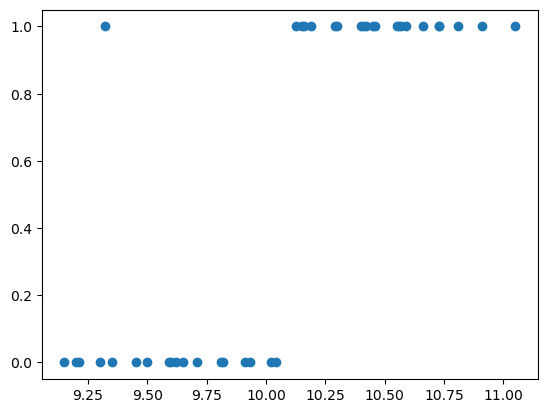

In [48]:
plt.scatter(df[['size(cm)']], df['class(y)'])

In [49]:
x = df.iloc[:, 0:1]
y = df.iloc[:, 1]

In [50]:
x.head()

,size(cm)
0,9.500
1,10.125
2,10.410
3,9.810
4,11.050


In [51]:
pd.DataFrame(y).head()

,class(y)
0,0
1,1
2,1
3,0
4,1


In [ ]:
# Train and Test split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.30, random_state=2)

In [53]:
xTrain.shape

(28, 1)

In [54]:
xTest.shape

(12, 1)

In [ ]:
# Defination of LogisticRegression model's object
# Excute model training 
logistic_reg_model = LogisticRegression()
training = logistic_reg_model.fit(xTrain, yTrain)
training

LogisticRegression()

In [ ]:
# Test for test split data
testing = logistic_reg_model.fit(xTest, yTest)
testing

LogisticRegression()

In [ ]:
# Overfitting evaluation using R Square
score_training = logistic_reg_model.score(xTrain, yTrain)
score_training

0.8571428571428571

In [58]:
score_testing = logistic_reg_model.score(xTest, yTest)
score_testing

1.0

In [ ]:
# Cross validation for Training
model_for_cv = LogisticRegression(max_iter=100)
score_cv_training = cross_val_score(model_for_cv, xTrain, yTrain, cv=5)
print(score_cv_training)
print(score_cv_training.mean())

[0.83333333 0.66666667 1.         0.8        1.        ]
0.86


In [ ]:
# Cross validation for Testing
score_cv_testing = cross_val_score(model_for_cv, xTest, yTest, cv=4)
print(score_cv_testing)
print(score_cv_testing.mean())

[1. 1. 1. 1.]
1.0


In [65]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [ ]:
# Prediction for all values of X independent variable
yPredicted = logistic_reg_model.predict(x)
pd.DataFrame(yPredicted).head()

,0
0,0
1,0
2,1
3,0
4,1


In [ ]:
# Single prediction
ySinglePredict = logistic_reg_model.predict([[10.125]])
ySinglePredict

d:\Software\Development_Tools\Anaconda\New folder\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
# Probability of Class 1 and O
probability = logistic_reg_model.predict_proba(x)
probability

array([0.24969623, 0.48326501, 0.59969759, 0.35715539, 0.81187988,
       0.15724607, 0.23453216, 0.6612169 , 0.320156  , 0.29896135,
       0.36096002, 0.60365972, 0.51012234, 0.77396201, 0.65377113,
       0.71773184, 0.44014983, 0.40387508, 0.55535962, 0.66858373,
       0.49359178, 0.20616196, 0.16851315, 0.69370805, 0.28867138,
       0.61936803, 0.55127357, 0.74373959, 0.6154629 , 0.71773184,
       0.44831294, 0.39594039, 0.59572239, 0.27859483, 0.49772452,
       0.19296179, 0.17084231, 0.65750371, 0.28192961, 0.19816319])

In [ ]:
# Decison boundary of Class 1
probability_class_1 = logistic_reg_model.predict_proba(x)[:, 1]
pd.DataFrame(probability_class_1).head()

,0
0,0.249696
1,0.483265
2,0.599698
3,0.357155
4,0.811880
